# Smart Building Project 

###### 20250710

Dataset: https://www.kaggle.com/datasets/claytonmiller/cubems-smart-building-energy-and-iaq-data

The data is recorded on 01 JAN 2019 to 31 DEC 2019 on the minute precision.

2019Floor2.csv has 36 data columns, which are: 

- Zone 1–Power consumption (kW) of 
  - the AC unit, 
  - lighting loads and plug loads, as well as 
  - indoor temperature (deg C), 
  - relative humidity (%) and 
  - ambient light condition (lux) 
 measured in this zone (six columns). 

- Zone 2–Power consumption (kW) of 
  - 14 individual AC units, 
  - lighting loads and plug loads, as well as 
  - indoor temperature (deg C), 
  - relative humidity (%) and 
  - ambient light condition (lux) 
in this zone (19 columns); 

- Zone 3–Power consumption (kW) of 
  - lighting loads and plug loads, and
  - indoor temperature (deg C), 
  - relative humidity (%) and 
  - ambient light condition (lux) 
in this zone (five columns); 

- Zone 4: Power consumption (kW) of the AC unit, 
  - lighting loads, 
  - plug loads and 
  - indoor temperature (deg C), 
  - relative humidity (%) and 
  - ambient light condition (lux) 
in this zone (six columns).

## Goals

1. Profile energy usage patterns (AC, lighting, plugs) over time.
   
2. Identify anomalies (e.g., spikes/drops in consumption).
   
3. Predict short-term energy demand (time-series forecasting).
   
4. Cluster zones based on usage behavior (e.g., which zones are most correlated?).

In [1]:
# Import Libraries
import pandas as pd      
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# For the purpose of this project, 2019Floor2.csv is selected for the analysis

In [3]:
# Import the Dataset
df0 = pd.read_csv('2019Floor2.csv')
df = df0.copy()

df

,Date,z1_AC1(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),...,z3_Plug(kW),z3_S1(degC),z3_S1(RH%),z3_S1(lux),z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux)
0,2019-01-01 00:00:00,0.0,0.31,0.09,NaN,NaN,NaN,0.00,1.15,0.85,...,0.23,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
1,2019-01-01 00:01:00,0.0,0.31,0.09,NaN,NaN,NaN,0.00,1.14,0.84,...,0.23,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
2,2019-01-01 00:02:00,0.0,0.31,0.09,NaN,NaN,NaN,0.00,1.14,0.83,...,0.23,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
3,2019-01-01 00:03:00,0.0,0.31,0.09,NaN,NaN,NaN,0.85,1.15,0.84,...,0.23,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
4,2019-01-01 00:04:00,0.0,0.31,0.09,NaN,NaN,NaN,0.94,1.17,0.87,...,0.23,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2019-12-31 23:55:00,0.0,0.01,0.18,27.65,61.50,0.0,1.12,0.00,0.00,...,0.24,28.34,58.94,0.0,0.0,0.0,0.0,27.81,55.30,0.0
525596,2019-12-31 23:56:00,0.0,0.01,0.18,27.66,61.45,0.0,1.13,0.00,0.00,...,0.24,28.34,58.36,0.0,0.0,0.0,0.0,27.81,55.60,0.0
525597,2019-12-31 23:57:00,0.0,0.01,0.18,27.65,61.49,0.0,1.16,0.00,0.00,...,0.24,28.37,57.74,0.0,0.0,0.0,0.0,27.80,55.10,0.0
525598,2019-12-31 23:58:00,0.0,0.01,0.18,27.66,61.50,0.0,1.17,0.00,0.00,...,0.24,28.35,57.83,0.0,0.0,0.0,0.0,27.82,55.80,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 37 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          525600 non-null  object 
 1   z1_AC1(kW)    495832 non-null  float64
 2   z1_Light(kW)  524967 non-null  float64
 3   z1_Plug(kW)   524964 non-null  float64
 4   z1_S1(degC)   413992 non-null  float64
 5   z1_S1(RH%)    413992 non-null  float64
 6   z1_S1(lux)    413992 non-null  float64
 7   z2_AC1(kW)    495710 non-null  float64
 8   z2_AC2(kW)    523441 non-null  float64
 9   z2_AC3(kW)    523441 non-null  float64
 10  z2_AC4(kW)    523441 non-null  float64
 11  z2_AC5(kW)    524949 non-null  float64
 12  z2_AC6(kW)    524949 non-null  float64
 13  z2_AC7(kW)    524949 non-null  float64
 14  z2_AC8(kW)    524949 non-null  float64
 15  z2_AC9(kW)    524949 non-null  float64
 16  z2_AC10(kW)   524949 non-null  float64
 17  z2_AC11(kW)   524949 non-null  float64
 18  z2_A

In [5]:
# The shape of the data
df.shape

# 525600 rows, 37 columns

(525600, 37)

## Data Cleaning

In [6]:
# Check for duplicates
df.duplicated().value_counts()

# No duplicated values found

False    525600
Name: count, dtype: int64

In [7]:
# Check for missing values
df.isnull().sum()

# Lots of values found to be missing

Date                 0
z1_AC1(kW)       29768
z1_Light(kW)       633
z1_Plug(kW)        636
z1_S1(degC)     111608
z1_S1(RH%)      111608
z1_S1(lux)      111608
z2_AC1(kW)       29890
z2_AC2(kW)        2159
z2_AC3(kW)        2159
z2_AC4(kW)        2159
z2_AC5(kW)         651
z2_AC6(kW)         651
z2_AC7(kW)         651
z2_AC8(kW)         651
z2_AC9(kW)         651
z2_AC10(kW)        651
z2_AC11(kW)        651
z2_AC12(kW)        651
z2_AC13(kW)        651
z2_AC14(kW)        651
z2_Light(kW)       736
z2_Plug(kW)        783
z2_S1(degC)      97021
z2_S1(RH%)       97018
z2_S1(lux)       97020
z3_Light(kW)       634
z3_Plug(kW)        633
z3_S1(degC)     102411
z3_S1(RH%)      102410
z3_S1(lux)      102414
z4_AC1(kW)       29772
z4_Light(kW)      2159
z4_Plug(kW)        783
z4_S1(degC)     103285
z4_S1(RH%)      103283
z4_S1(lux)      103288
dtype: int64

In [8]:
# The values can be missing for various reasons. (e.g. Sensor Failures, Temporary Power Usage, Data Processing Bugs, etc.)
# So checking on time interval of usage would make sense

# Since the Date column is necessary for indexing, that column is first to be dealt with

In [9]:
df.Date

0         2019-01-01 00:00:00
1         2019-01-01 00:01:00
2         2019-01-01 00:02:00
3         2019-01-01 00:03:00
4         2019-01-01 00:04:00
                 ...         
525595    2019-12-31 23:55:00
525596    2019-12-31 23:56:00
525597    2019-12-31 23:57:00
525598    2019-12-31 23:58:00
525599    2019-12-31 23:59:00
Name: Date, Length: 525600, dtype: object

In [10]:
# Convert Date to Datetime
df['Date'] = pd.to_datetime(df['Date'])

df['Date']

0        2019-01-01 00:00:00
1        2019-01-01 00:01:00
2        2019-01-01 00:02:00
3        2019-01-01 00:03:00
4        2019-01-01 00:04:00
                 ...        
525595   2019-12-31 23:55:00
525596   2019-12-31 23:56:00
525597   2019-12-31 23:57:00
525598   2019-12-31 23:58:00
525599   2019-12-31 23:59:00
Name: Date, Length: 525600, dtype: datetime64[ns]

In [11]:
# Set Column as Index
df.set_index('Date', inplace=True)

In [12]:
# Check Dataset Index
df.index

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 00:01:00',
               '2019-01-01 00:02:00', '2019-01-01 00:03:00',
               '2019-01-01 00:04:00', '2019-01-01 00:05:00',
               '2019-01-01 00:06:00', '2019-01-01 00:07:00',
               '2019-01-01 00:08:00', '2019-01-01 00:09:00',
               ...
               '2019-12-31 23:50:00', '2019-12-31 23:51:00',
               '2019-12-31 23:52:00', '2019-12-31 23:53:00',
               '2019-12-31 23:54:00', '2019-12-31 23:55:00',
               '2019-12-31 23:56:00', '2019-12-31 23:57:00',
               '2019-12-31 23:58:00', '2019-12-31 23:59:00'],
              dtype='datetime64[ns]', name='Date', length=525600, freq=None)

In [13]:
# Check for monotonic increment of index to ensure no out-of-order timestamps
df.index.is_monotonic_increasing

True

In [14]:
# Now the Date is set to index
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2019-01-01 00:00:00 to 2019-12-31 23:59:00
Data columns (total 36 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   z1_AC1(kW)    495832 non-null  float64
 1   z1_Light(kW)  524967 non-null  float64
 2   z1_Plug(kW)   524964 non-null  float64
 3   z1_S1(degC)   413992 non-null  float64
 4   z1_S1(RH%)    413992 non-null  float64
 5   z1_S1(lux)    413992 non-null  float64
 6   z2_AC1(kW)    495710 non-null  float64
 7   z2_AC2(kW)    523441 non-null  float64
 8   z2_AC3(kW)    523441 non-null  float64
 9   z2_AC4(kW)    523441 non-null  float64
 10  z2_AC5(kW)    524949 non-null  float64
 11  z2_AC6(kW)    524949 non-null  float64
 12  z2_AC7(kW)    524949 non-null  float64
 13  z2_AC8(kW)    524949 non-null  float64
 14  z2_AC9(kW)    524949 non-null  float64
 15  z2_AC10(kW)   524949 non-null  float64
 16  z2_AC11(kW)   524949 non-null  float64
 17  z2_AC12(kW)   

In [15]:
df

,z1_AC1(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),...,z3_Plug(kW),z3_S1(degC),z3_S1(RH%),z3_S1(lux),z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux)
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,0.0,0.31,0.09,NaN,NaN,NaN,0.00,1.15,0.85,0.91,...,0.23,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
2019-01-01 00:01:00,0.0,0.31,0.09,NaN,NaN,NaN,0.00,1.14,0.84,0.90,...,0.23,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
2019-01-01 00:02:00,0.0,0.31,0.09,NaN,NaN,NaN,0.00,1.14,0.83,0.90,...,0.23,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
2019-01-01 00:03:00,0.0,0.31,0.09,NaN,NaN,NaN,0.85,1.15,0.84,0.91,...,0.23,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
2019-01-01 00:04:00,0.0,0.31,0.09,NaN,NaN,NaN,0.94,1.17,0.87,0.93,...,0.23,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:55:00,0.0,0.01,0.18,27.65,61.50,0.0,1.12,0.00,0.00,0.00,...,0.24,28.34,58.94,0.0,0.0,0.0,0.0,27.81,55.30,0.0
2019-12-31 23:56:00,0.0,0.01,0.18,27.66,61.45,0.0,1.13,0.00,0.00,0.00,...,0.24,28.34,58.36,0.0,0.0,0.0,0.0,27.81,55.60,0.0
2019-12-31 23:57:00,0.0,0.01,0.18,27.65,61.49,0.0,1.16,0.00,0.00,0.00,...,0.24,28.37,57.74,0.0,0.0,0.0,0.0,27.80,55.10,0.0


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
z1_AC1(kW),495832.0,8.597785,14.030014,0.00,0.00,0.00,20.11,54.51
z1_Light(kW),524967.0,2.567044,3.445799,0.00,0.01,0.01,6.82,22.38
z1_Plug(kW),524964.0,1.116926,1.284228,0.00,0.25,0.36,2.29,9.82
z1_S1(degC),413992.0,24.364055,2.768803,17.56,21.31,25.10,26.35,31.90
z1_S1(RH%),413992.0,62.706308,4.945365,45.50,59.45,62.90,66.21,76.90
z1_S1(lux),413992.0,27.447463,35.049539,0.00,0.00,0.00,71.00,92.00
z2_AC1(kW),495710.0,6.703165,10.648460,0.00,0.15,1.11,14.32,50.46
z2_AC2(kW),523441.0,0.611393,0.526641,0.00,0.23,0.25,1.18,2.43
z2_AC3(kW),523441.0,0.405175,0.440366,0.00,0.00,0.00,0.88,2.08
z2_AC4(kW),523441.0,0.452219,0.490950,0.00,0.00,0.00,0.98,2.04


In [17]:
# Amount of missing data in the dataset
missing_count = df.isna().sum()

In [18]:
# Calculate missing percentages
missing_pct = df.isna().mean() * 100

In [19]:
# Sort in descending order
missing_count_sort = missing_count.sort_values(ascending=False)
missing_pct_sort = missing_pct.sort_values(ascending=False)

In [20]:
print("Missing Value Count:")
print(missing_count_sort)

Missing Value Count:
z1_S1(degC)     111608
z1_S1(RH%)      111608
z1_S1(lux)      111608
z4_S1(lux)      103288
z4_S1(degC)     103285
z4_S1(RH%)      103283
z3_S1(lux)      102414
z3_S1(degC)     102411
z3_S1(RH%)      102410
z2_S1(degC)      97021
z2_S1(lux)       97020
z2_S1(RH%)       97018
z2_AC1(kW)       29890
z4_AC1(kW)       29772
z1_AC1(kW)       29768
z2_AC2(kW)        2159
z4_Light(kW)      2159
z2_AC3(kW)        2159
z2_AC4(kW)        2159
z4_Plug(kW)        783
z2_Plug(kW)        783
z2_Light(kW)       736
z2_AC10(kW)        651
z2_AC6(kW)         651
z2_AC5(kW)         651
z2_AC13(kW)        651
z2_AC11(kW)        651
z2_AC7(kW)         651
z2_AC8(kW)         651
z2_AC9(kW)         651
z2_AC14(kW)        651
z2_AC12(kW)        651
z1_Plug(kW)        636
z3_Light(kW)       634
z3_Plug(kW)        633
z1_Light(kW)       633
dtype: int64


In [21]:
print("Missing Value Percentages:")
print(missing_pct_sort)

Missing Value Percentages:
z1_S1(degC)     21.234399
z1_S1(RH%)      21.234399
z1_S1(lux)      21.234399
z4_S1(lux)      19.651446
z4_S1(degC)     19.650875
z4_S1(RH%)      19.650495
z3_S1(lux)      19.485160
z3_S1(degC)     19.484589
z3_S1(RH%)      19.484399
z2_S1(degC)     18.459094
z2_S1(lux)      18.458904
z2_S1(RH%)      18.458524
z2_AC1(kW)       5.686834
z4_AC1(kW)       5.664384
z1_AC1(kW)       5.663623
z2_AC2(kW)       0.410769
z4_Light(kW)     0.410769
z2_AC3(kW)       0.410769
z2_AC4(kW)       0.410769
z4_Plug(kW)      0.148973
z2_Plug(kW)      0.148973
z2_Light(kW)     0.140030
z2_AC10(kW)      0.123858
z2_AC6(kW)       0.123858
z2_AC5(kW)       0.123858
z2_AC13(kW)      0.123858
z2_AC11(kW)      0.123858
z2_AC7(kW)       0.123858
z2_AC8(kW)       0.123858
z2_AC9(kW)       0.123858
z2_AC14(kW)      0.123858
z2_AC12(kW)      0.123858
z1_Plug(kW)      0.121005
z3_Light(kW)     0.120624
z3_Plug(kW)      0.120434
z1_Light(kW)     0.120434
dtype: float64


In [22]:
# Combine into a DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage (%)': missing_pct
})

# Filter to only show columns with missing values
missing_data = missing_data[missing_data['Missing Values'] > 0]

# Sort by percentage descending
missing_data = missing_data.sort_values('Percentage (%)', ascending=False)

# Format the percentage column
missing_data['Percentage (%)'] = missing_data['Percentage (%)'].round(6)

# Display the table
print("Missing Data Summary:")
missing_data

Missing Data Summary:


,Missing Values,Percentage (%)
z1_S1(degC),111608,21.234399
z1_S1(RH%),111608,21.234399
z1_S1(lux),111608,21.234399
z4_S1(lux),103288,19.651446
z4_S1(degC),103285,19.650875
z4_S1(RH%),103283,19.650495
z3_S1(lux),102414,19.485160
z3_S1(degC),102411,19.484589
z3_S1(RH%),102410,19.484399
z2_S1(degC),97021,18.459094


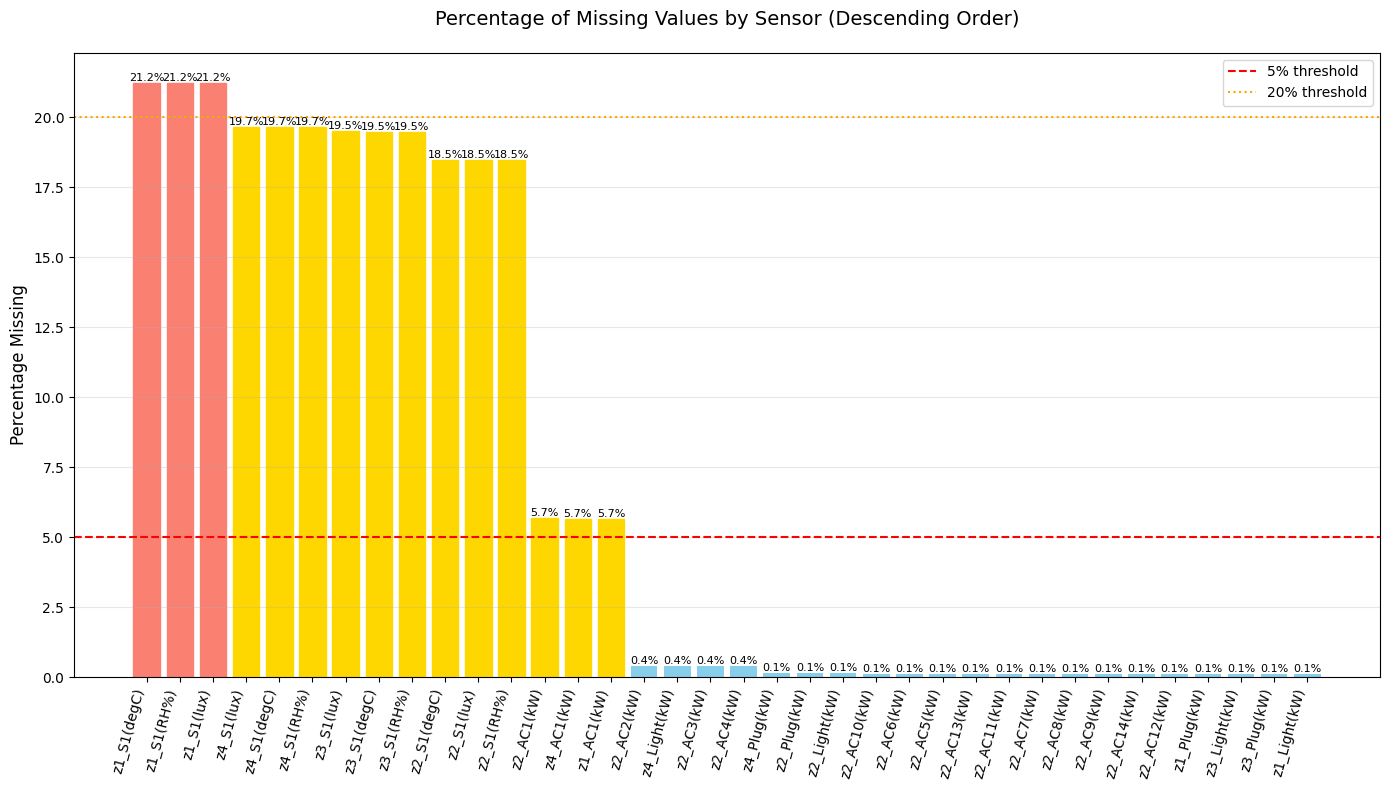

In [23]:
# Visualising all missing data across all sensors

# Visualize missingness patterns
plt.figure(figsize=(14, 8))
bars = plt.bar(missing_pct_sort.index, missing_pct_sort, color='skyblue')

# Add threshold line and customize
plt.axhline(y=5, color='r', linestyle='--', label='5% threshold', linewidth=1.5)
plt.axhline(y=20, color='orange', linestyle=':', label='20% threshold', linewidth=1.5)

# Highlight problematic sensors
for bar in bars:
    if bar.get_height() > 20:
        bar.set_color('salmon')
    elif bar.get_height() > 5:
        bar.set_color('gold')

        
# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom', fontsize=8)


# Formatting
plt.title("Percentage of Missing Values by Sensor (Descending Order)", fontsize=14, pad=20)
plt.ylabel("Percentage Missing", fontsize=12)
plt.xticks(rotation=75, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.legend(fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

In [24]:
# The sensors with the longest outage periods are the Temperature, Humidity, and the Luminance sensors
# These 3 sensor types are missing the most data in zones 1, 4, 3, and 2 respectively
# AC1s in Zone 1,2, and 4 have the same amount of missing data
# Zone 3 has no AC

In [25]:
# Data has shown outages are more dependent on sensor types rather than zones
# Therefore, it would make more sense to focus the investigation on different sensor types

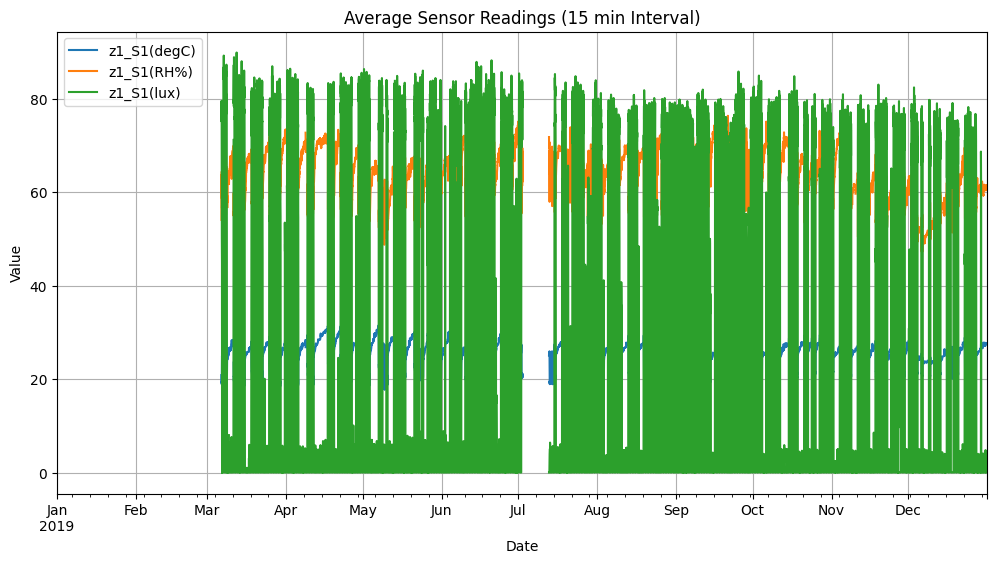

In [26]:
# Plotting the 1st, 2nd, 3rd sensors with most missing data (resampled to 15 min interval)
df[missing_pct_sort.iloc[:3].index].resample('15min').mean().plot(figsize=(12, 6))
plt.title("Average Sensor Readings (15 min Interval)")
plt.ylabel("Value")
plt.xlabel("Date")
plt.grid(True)
plt.show()

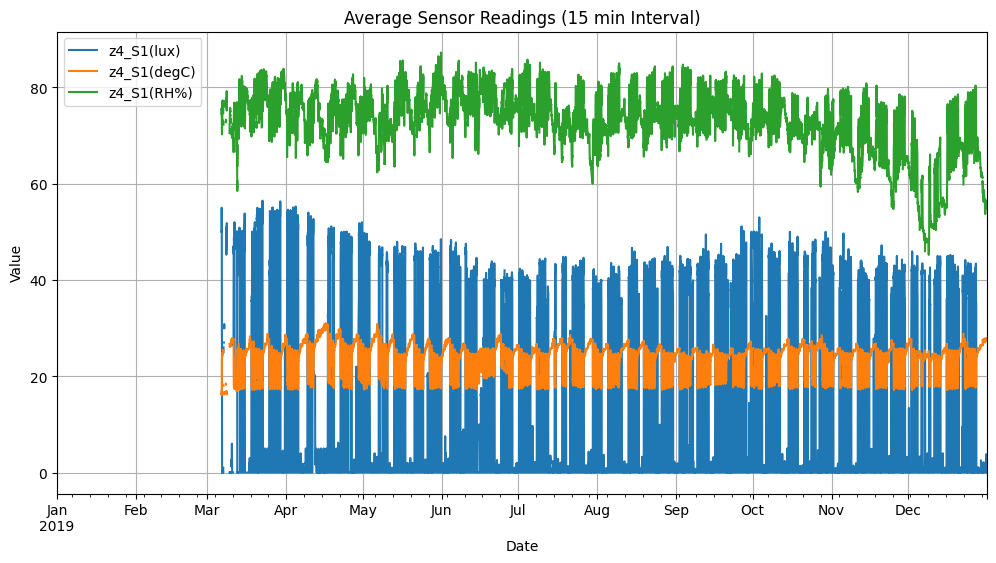

In [27]:
# Plotting the 4th, 5th, 6th sensors with most missing data
df[missing_pct_sort.iloc[3:6].index].resample('15min').mean().plot(figsize=(12, 6))
plt.title("Average Sensor Readings (15 min Interval)")
plt.ylabel("Value")
plt.xlabel("Date")
plt.grid(True)
plt.show()

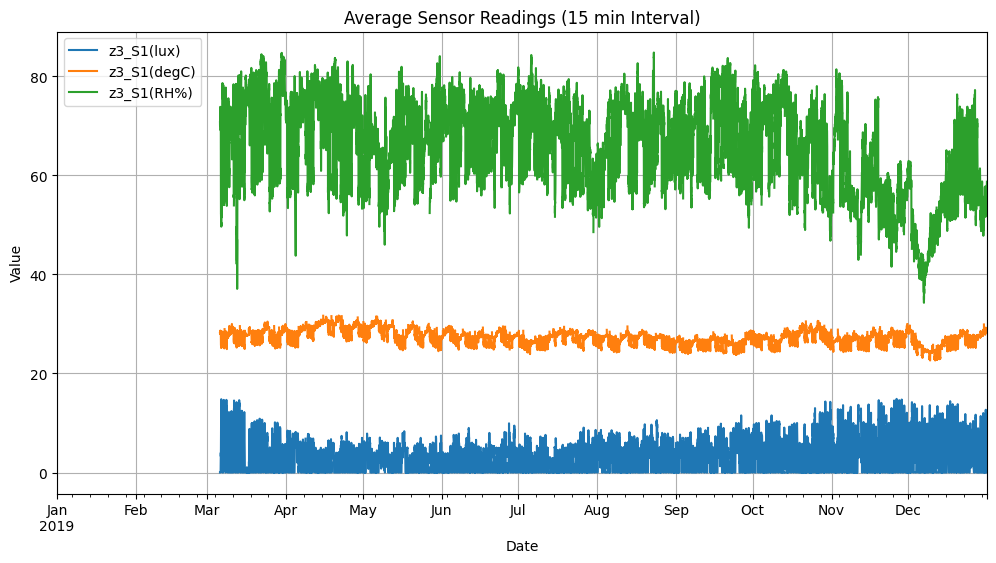

In [28]:
# Plotting the 7th, 8th, 9th sensors with most missing data
df[missing_pct_sort.iloc[6:9].index].resample('15min').mean().plot(figsize=(12, 6))
plt.title("Average Sensor Readings (15 min Interval)")
plt.ylabel("Value")
plt.xlabel("Date")
plt.grid(True)
plt.show()

In [29]:
# The first 12 sensors with most missing data are all temperature, humidity, and luminance sensors
# These sensors are in zones 1,4,3, and 2 respectively

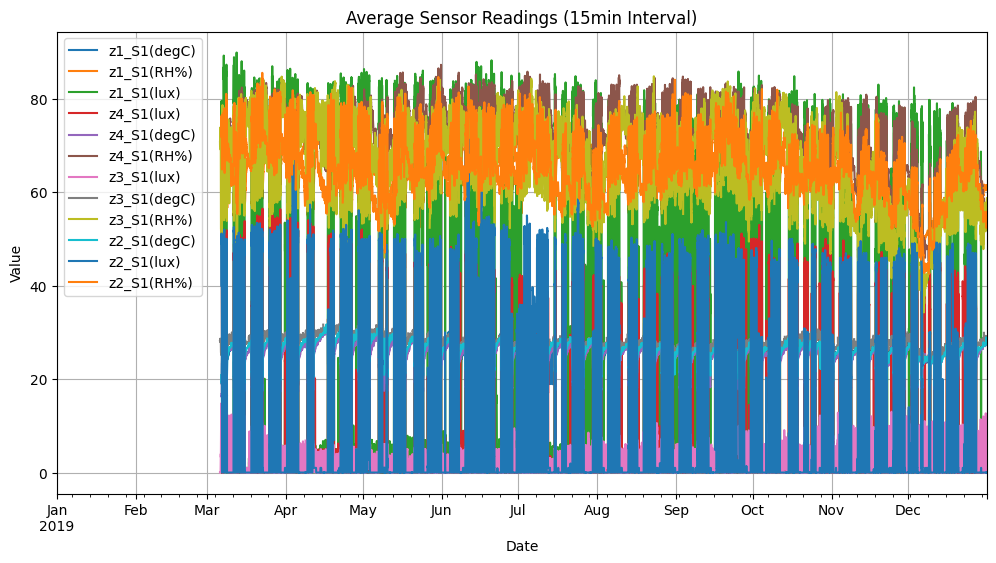

In [30]:
# The first 12 sensors with most missing data
df[missing_pct_sort.iloc[:12].index].resample('15min').mean().plot(figsize=(12, 6))
plt.title("Average Sensor Readings (15min Interval)")
plt.ylabel("Value")
plt.xlabel("Date")
plt.grid(True)
plt.show()

In [31]:
# The pattern shows major outage to have all occured between 1 JAN to around 5 MAR
# The outage could likely have started before 2019.

In [32]:
# Since most other sensors seem to be working since 1 JAN 2019, 
# it is clear that the building has been in used before the date.

# So the outage across sensors are likely due to scheduled maintenance or renovation.

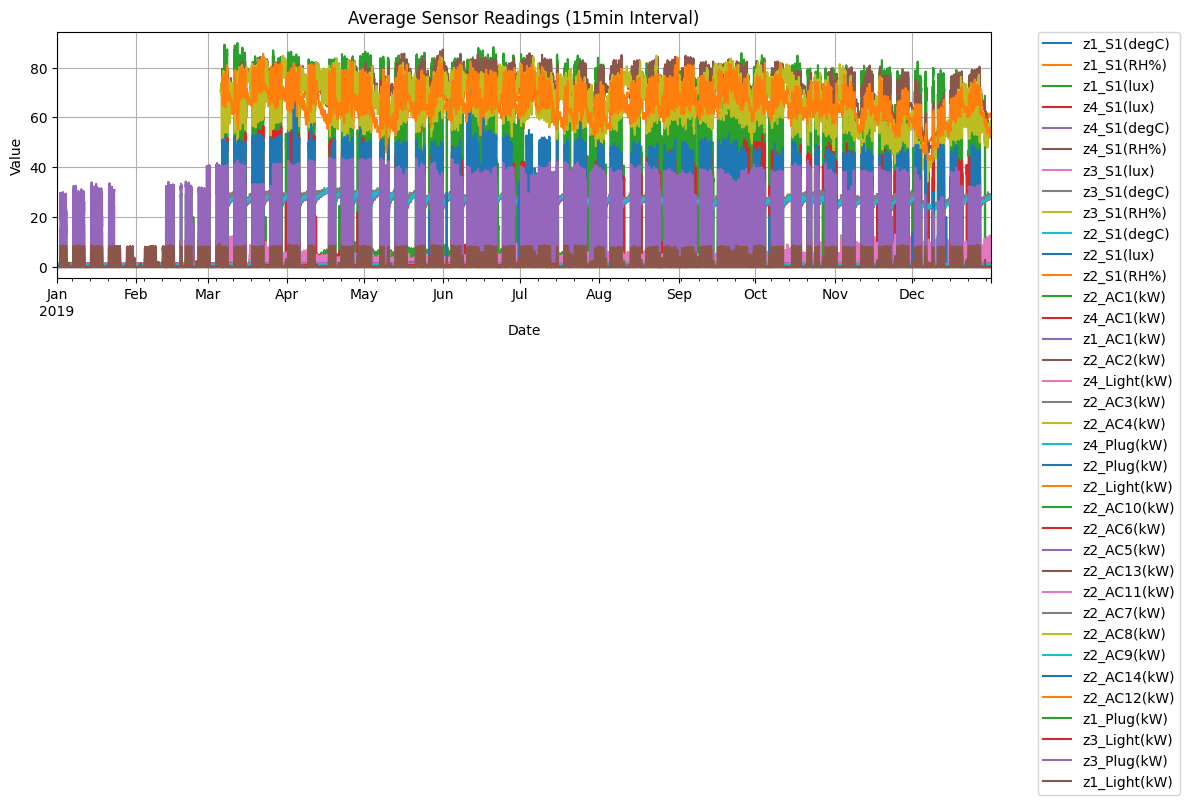

In [33]:
# Overview of the Outage in 2019
ax = df[missing_pct_sort.iloc[:].index].resample('15min').mean().plot(figsize=(12, 6))
plt.title("Average Sensor Readings (15min Interval)")
plt.ylabel("Value")
plt.xlabel("Date")
plt.grid(True)

# Move legend outside the plot to the right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Adjust layout to prevent legend from being cut off
plt.tight_layout()

plt.show()

In [34]:
# Examining Correlations between Sensors

In [35]:
# For binary missingness (1=missing, 0=present)
missing_mask = df.isna().astype(int)
# Calculate correlation between missingness patterns
missing_corr = missing_mask.corr()

<Figure size 1500x800 with 0 Axes>

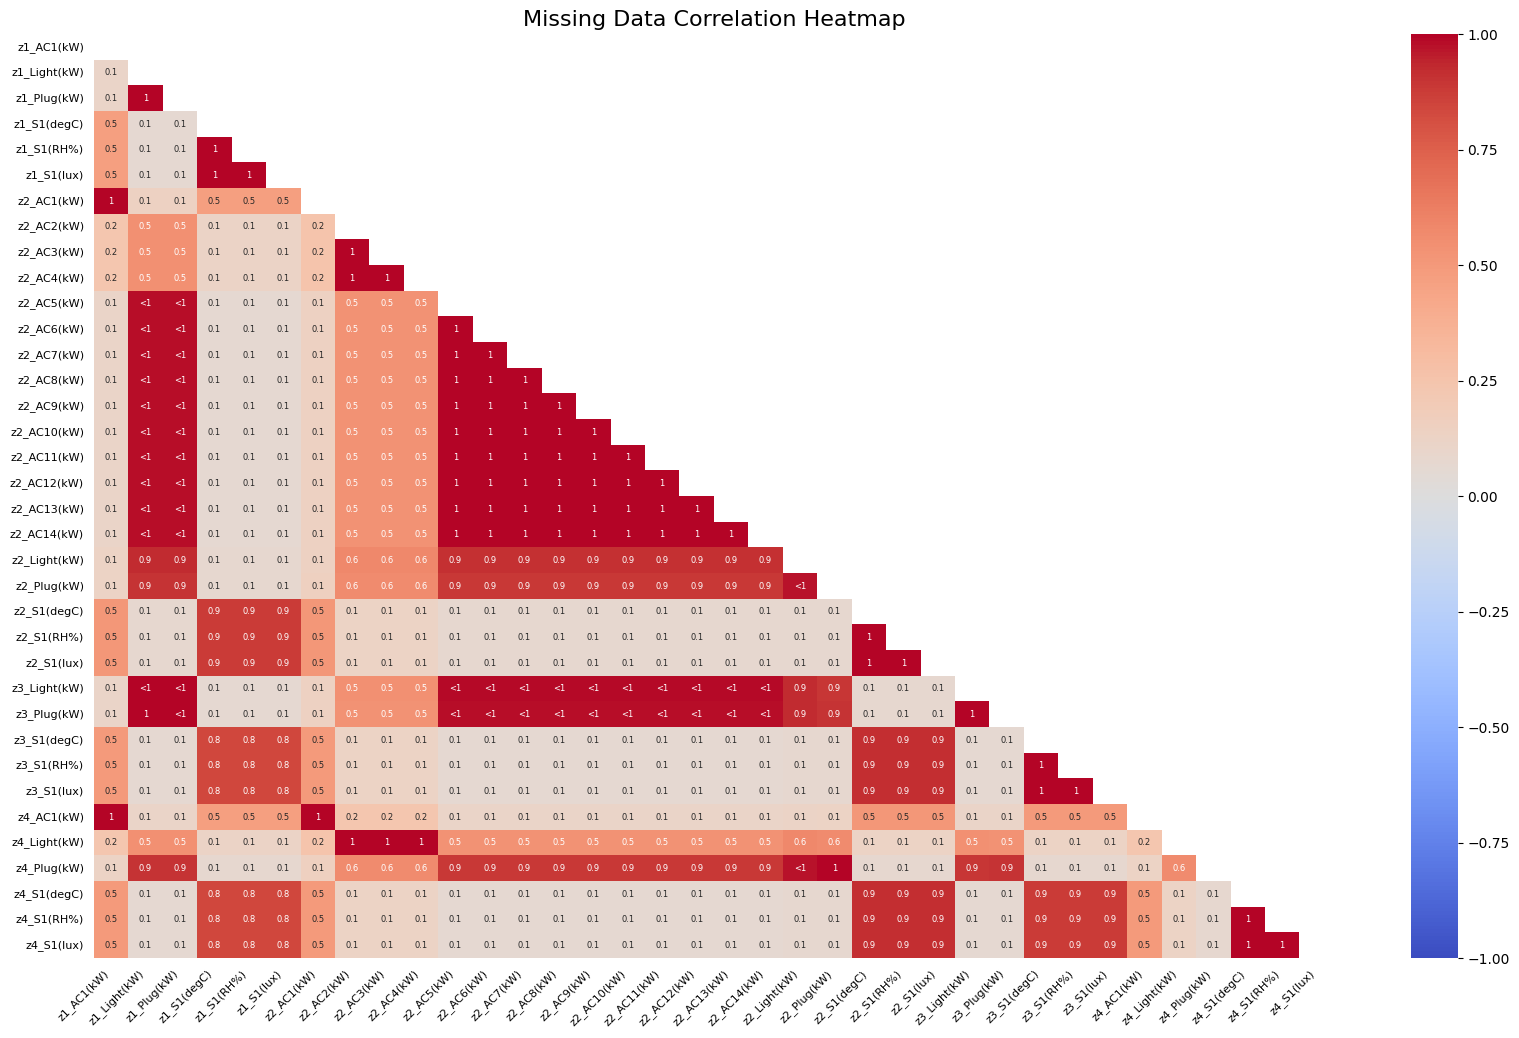

In [36]:
import missingno as msno
import matplotlib.pyplot as plt

# Create heatmap of missing data
plt.figure(figsize=(15, 8))
msno.heatmap(df, cmap="coolwarm", fontsize=8)
plt.title("Missing Data Correlation Heatmap", fontsize=16)
plt.show()

In [37]:
# Some insights revealed by the correlations:
#
# 1. Many of the ACs (AC5 - 14) in zone 2 are highly dependent on each other: Probably in a hall or a huge room
# 2. Zone 3 as no AC, but ACs in other zones (1,2,4) seems to all be sharing a centralised system
# 3. Lighting and Plug usages are in sync across all zones revealing the common behavioural pattern
# 4. Lighting and Plug usages in zone 2 also have a lot to do with the AC5 - 14: Another common behavioural pattern
# 5. Temp(degC), humidity(RH%), and luminance(lux) are highly correlated across all zones: Probably using the same pipeline 
# 
#  

In [38]:
# Visualising the outage across different zones 

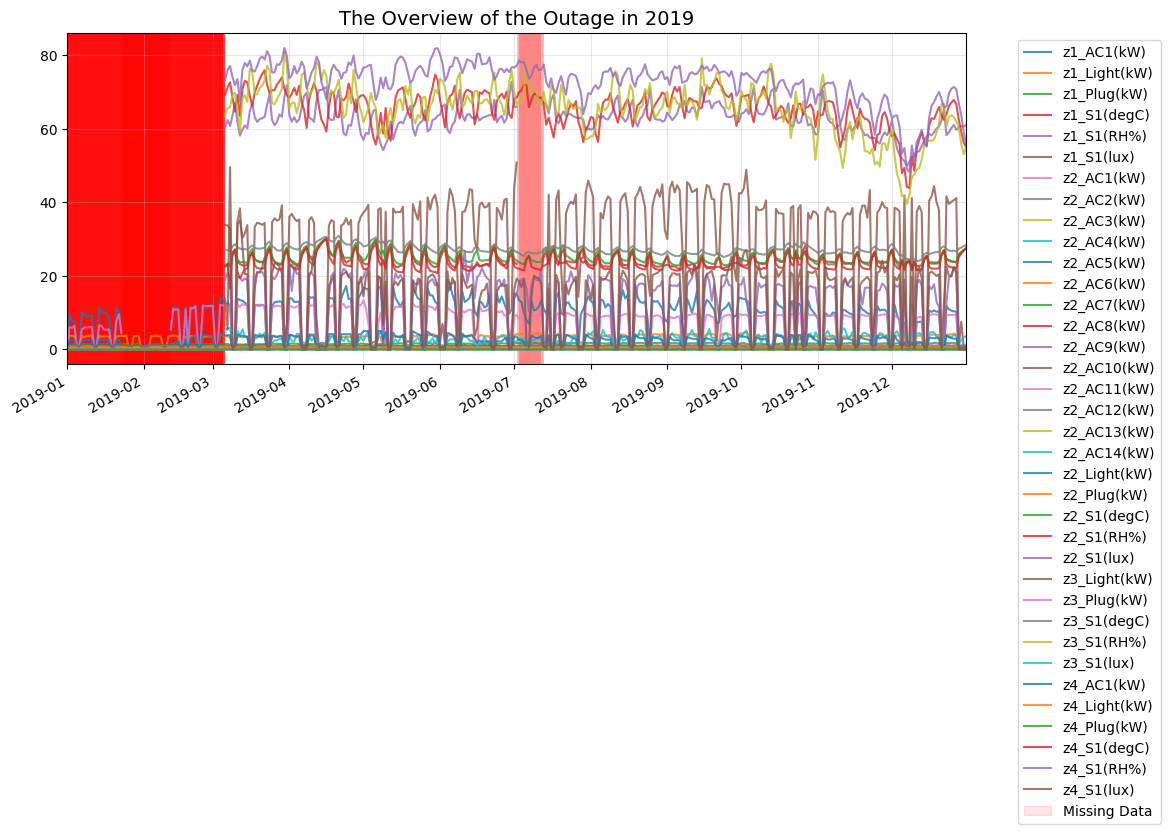

In [39]:
# Resample to daily averages
resampled_data = df.resample('D').mean()

# Create plot
plt.figure(figsize=(14, 7))

# Plot each temperature series and highlight missing data
for col in df.columns:
    # Plot available data
    line = plt.plot(resampled_data.index, resampled_data[col], label=col, alpha=0.8, linewidth=1.5)
    color = line[0].get_color()
    
    # Find missing data (NaN values)
    missing = resampled_data[col].isna()
    
    # Highlight missing periods with vertical bars
    missing_periods = np.where(missing)[0]
    for i in missing_periods:
        plt.axvspan(
            resampled_data.index[i] - pd.Timedelta('1D'),  # Start of gap
            resampled_data.index[i] + pd.Timedelta('1D'),  # End of gap
            color='red', alpha=0.1, lw=0  # Semi-transparent red
        )

# Customize plot
plt.title('The Overview of the Outage in 2019', fontsize=14)
# plt.xlabel(xlabel, fontsize=12)
# plt.ylabel(ylabel, fontsize=12)
plt.grid(True, alpha=0.3)

# Set x-axis limits to start at January 1st
plt.xlim([pd.Timestamp('2019-01-01'), resampled_data.index.max()])

# Add legend entry for missing data (proxy artist)
plt.axvspan(0, 0, color='red', alpha=0.1, label='Missing Data')

# Move legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Improve x-axis for time series
plt.gcf().autofmt_xdate()
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [40]:
def plot_outage_by_zone(zone):
    """
    Plot sensor data for a specific zone with missing data highlighted.
    
    Args:
        zone (str): Zone identifier to plot sensors for (e.g., 'ZoneA')
    """

    zone_sensors = [col for col in df.columns if col.startswith(zone)]
    
    if not zone_sensors:
        print(f"No sensors found for zone '{zone}'")
        return

    # Resample data
    resampled_data = df[zone_sensors].resample('15min').mean()

    # Create plot
    plt.figure(figsize=(14, 7))

    # Plot each sensor series and highlight missing data
    for col in zone_sensors:
        # First plot the actual data (missing from original code)
        plt.plot(resampled_data.index, resampled_data[col], label=col, alpha=0.8)
        
        # Find missing data (NaN values)
        missing = resampled_data[col].isna()
        
        # Highlight missing periods with vertical bars
        missing_periods = np.where(missing)[0]
        for i in missing_periods:
            plt.axvspan(
                resampled_data.index[i] - pd.Timedelta('7.5min'),  # Half interval before
                resampled_data.index[i] + pd.Timedelta('7.5min'),  # Half interval after
                color='red', alpha=0.1, lw=0  # Semi-transparent red
            )

    # Customize plot
    plt.title(f"Averages for {zone} Sensors (15 min interval)")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True, alpha=0.3)

    # Set x-axis limits to start at January 1st
    plt.xlim([pd.Timestamp('2019-01-01'), resampled_data.index.max()])

    # Add legend entry for missing data (proxy artist)
    plt.axvspan(0, 0, color='red', alpha=0.1, label='Missing Data')

    # Move legend outside
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

    plt.tight_layout()
    plt.show()

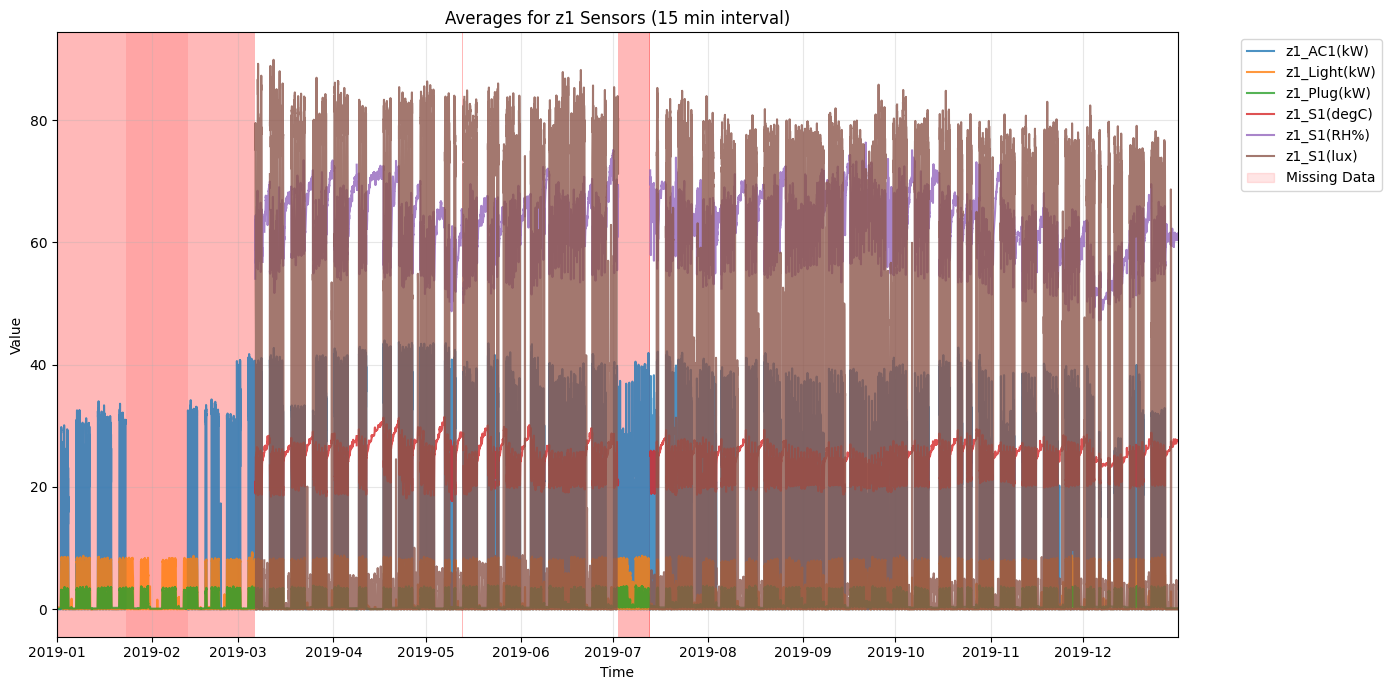

In [41]:
# Zone 1 is the only zone with a major outage in JUL, lasting over a week
plot_outage_by_zone('z1')

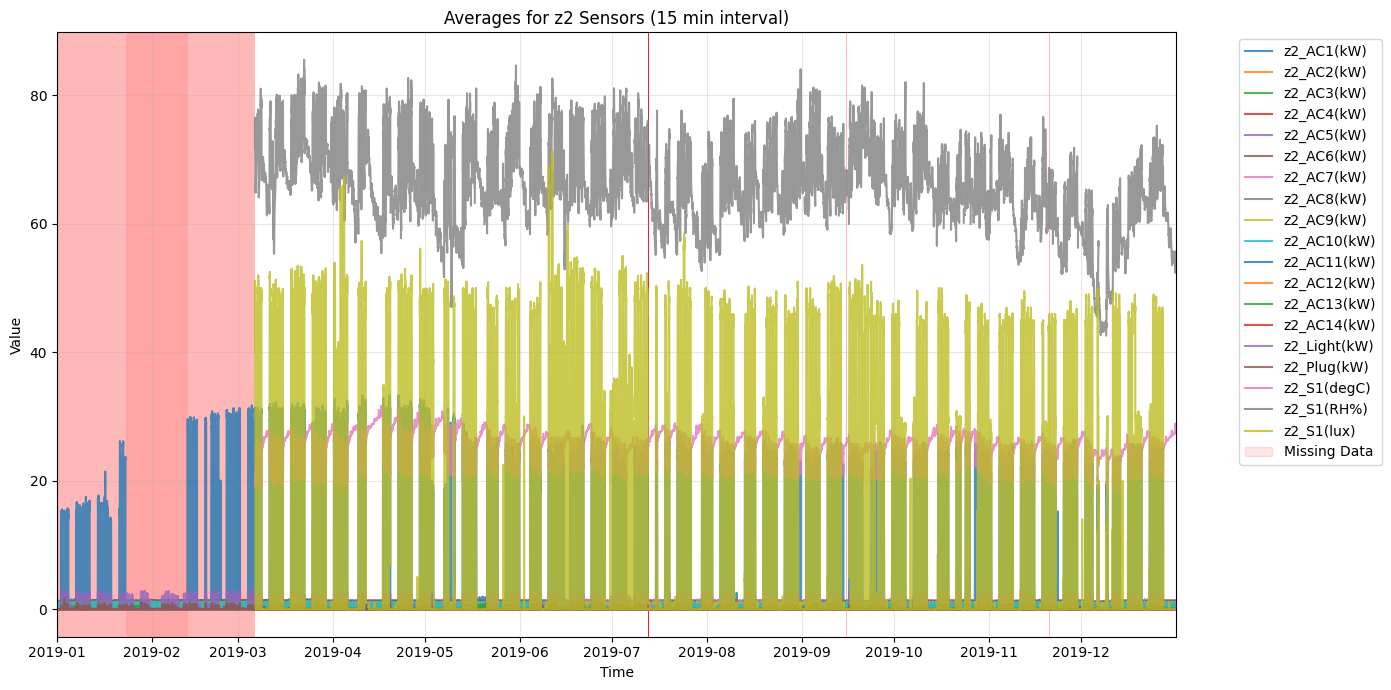

In [ ]:
# Zone 2 is similar to Zone 4
plot_outage_by_zone('z2')

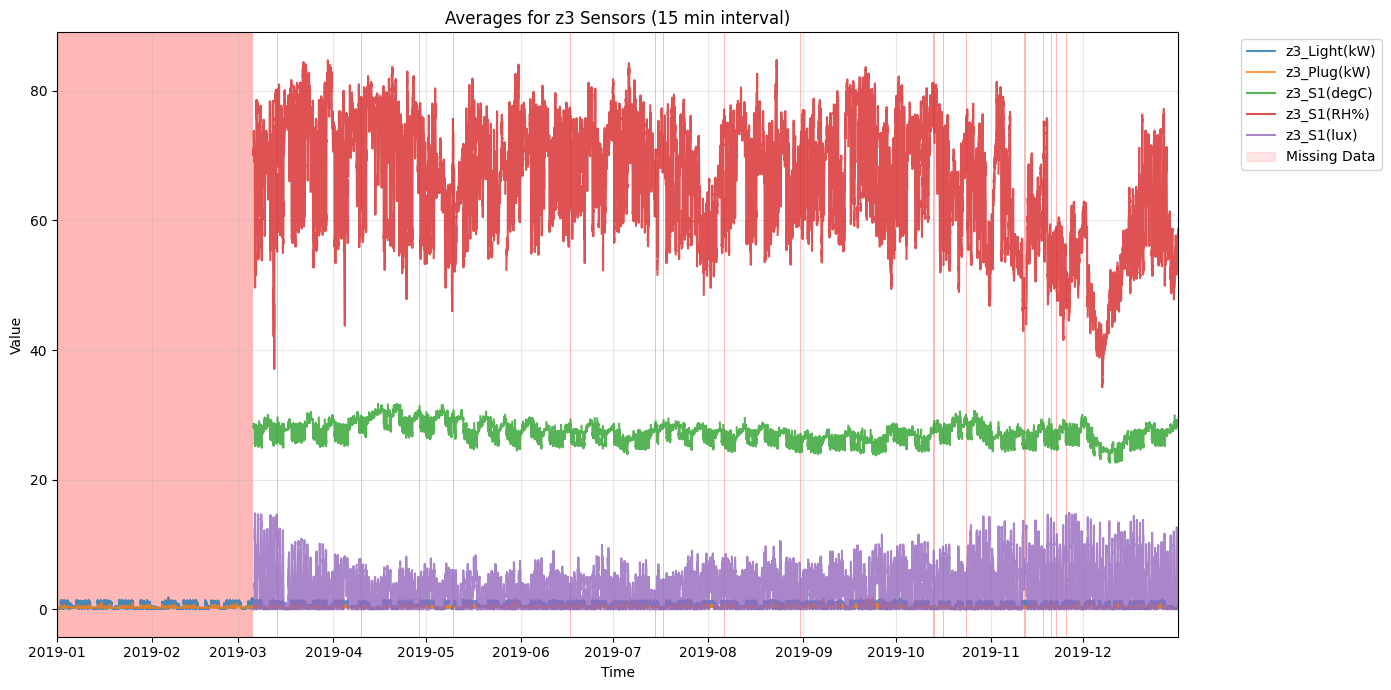

In [43]:
# Zone 3 has more minor outages throughout 2019
plot_outage_by_zone('z3')

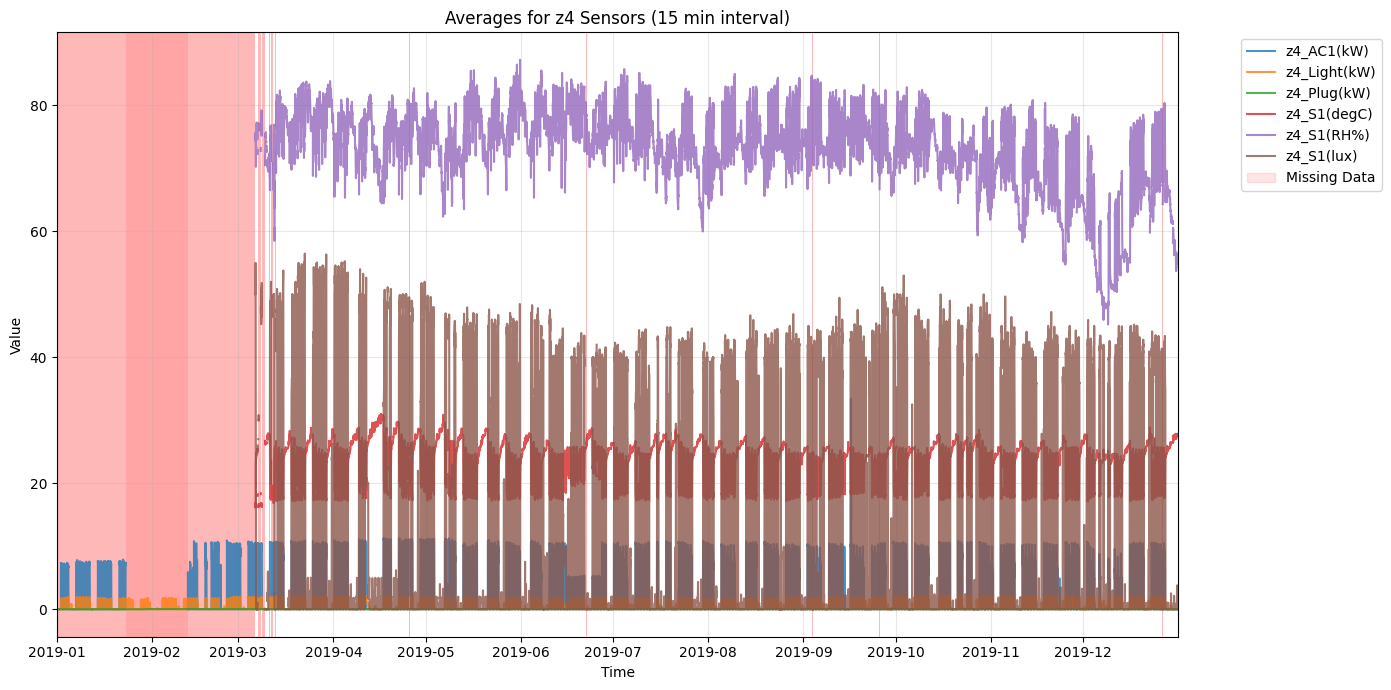

In [ ]:
# Zone 4 is similar to Zone 2
plot_outage_by_zone('z4')

In [45]:
# Visualising the outages by sensor types would make the most sense
# since all zones have major outages, but not every sensor type 
# have major outages across the entire year of 2019

In [46]:
import re

def print_outage_summary_by_type(sensor_type, min_outage_minutes=15):
    """
    Prints outage summaries for all sensors of a specific type.
    
    Args:
        df: Your DataFrame with DatetimeIndex
        sensor_type: Type of sensor to analyze ('degC', 'RH%', 'lux', 'AC', 'Plug', 'Light')
        min_outage_minutes: Minimum duration to consider as an outage (default 30 minutes)
    """
    # Map sensor types to column patterns
    type_patterns = {
        'degC': 'S1\(degC\)',
        'RH%': 'S1\(RH%\)',
        'lux': 'S1\(lux\)',
        'AC': 'AC\d?\(kW\)',
        'Plug': 'Plug\(kW\)',
        'Light': 'Light\(kW\)'
    }
    
    if sensor_type not in type_patterns:
        print(f"Unknown sensor type: {sensor_type}")
        print("Available types: 'degC', 'RH%', 'lux', 'AC', 'Plug', 'Light'")
        return
    
    # Find all matching columns
    pattern = type_patterns[sensor_type]
    matching_cols = [col for col in df.columns if re.search(pattern, col)]
    
    if not matching_cols:
        print(f"No columns found for sensor type: {sensor_type}")
        return
    
    print(f"\n=== Analyzing {len(matching_cols)} {sensor_type} sensors ===")
    
    for col in matching_cols:
        # Get the series and check for missing values
        series = df[col]
        if series.notna().all():
            print(f"\nNo outages detected in '{col}'")
            continue
        
        # Create outage flags
        is_outage = series.isna()
        outage_changes = is_outage.astype(int).diff()
        
        # Find outage start and end times
        starts = series.index[outage_changes == 1]
        ends = series.index[outage_changes == -1]
        
        # Handle edge cases
        if is_outage.iloc[0]:  # Starts with outage
            starts = starts.insert(0, series.index[0])
        if is_outage.iloc[-1]:  # Ends with outage
            ends = ends.append(pd.Index([series.index[-1]]))
        
        # Create outage periods
        outages = pd.DataFrame({'start': starts, 'end': ends})
        outages['duration'] = outages['end'] - outages['start']
        
        # Filter by minimum duration
        min_duration = pd.Timedelta(minutes=min_outage_minutes)
        significant_outages = outages[outages['duration'] >= min_duration]
        
        # Print summary
        print(f"\nOutage Summary for '{col}':")
        print(f"Total missing values: {series.isna().sum()} ({series.isna().mean():.1%})")
        print(f"Significant outages (>={min_outage_minutes} minutes): {len(significant_outages)}")
        
        if len(significant_outages) > 0:
            print("\nMajor Outage Periods:")
            for i, (_, row) in enumerate(significant_outages.iterrows(), 1):
                duration_hours = row['duration'].total_seconds() / 3600
                print(f"{i}. {row['start']} to {row['end']} "
                      f"({duration_hours:.1f} hours)")
        
        # Print longest outage if any
        if len(significant_outages) > 0:
            longest = significant_outages['duration'].max()
            longest_hours = longest.total_seconds() / 3600
            print(f"Longest outage: {longest_hours:.1f} hours")



In [47]:
# Example usage:
# print_outage_summary_by_type('degC')


In [48]:
# print_outage_summary_by_type('RH%')k

In [49]:
# print_outage_summary_by_type('AC')

In [50]:
# print_outage_summary_by_type('lux')

In [51]:
# print_outage_summary_by_type('Plug')

In [52]:
# print_outage_summary_by_type('Light')

In [53]:
# Visualising outage by sensor type

In [54]:
def plot_outage_by_sensor_type(sensor_type):
    """
    Plot sensor data for a specific sensor type with missing data highlighted.
    
    Args:
        sensor_type (str): Sensor type to plot (e.g., 'Temperature', 'Humidity')
    """

    type_sensors = [col for col in df.columns if sensor_type in col]
    
    # Fix: Check if any sensors were found, not if sensor_type is empty
    if not type_sensors:
        print(f"No columns found containing '{sensor_type}'")
        return
    
    # Resample data and store for missing data detection
    resampled_data = df[type_sensors].resample('15min').mean()
    
    # Create plot
    plt.figure(figsize=(14, 6))
    
    # Plot all sensors first
    for col in type_sensors:
        plt.plot(resampled_data.index, resampled_data[col], label=col, alpha=0.8)
        
        # Find missing data (NaN values)
        missing = resampled_data[col].isna()
        
        # Highlight missing periods with vertical bars
        missing_periods = np.where(missing)[0]
        for i in missing_periods:
            plt.axvspan(
                resampled_data.index[i] - pd.Timedelta('7.5min'),  # Half interval before
                resampled_data.index[i] + pd.Timedelta('7.5min'),  # Half interval after
                color='red', alpha=0.1, lw=0  # Semi-transparent red
            )

    # Set x-axis limits to start at January 1st
    plt.xlim([pd.Timestamp('2019-01-01'), resampled_data.index.max()])


    if sensor_type == 'degC':
        sensor_type_name = 'Temperature'
    elif sensor_type == 'RH%':
        sensor_type_name = 'Humidity'
    elif sensor_type == 'lux':
        sensor_type_name = 'Luminance'
    elif sensor_type == 'AC':
        sensor_type_name = 'Air Conditioner'
    elif sensor_type == 'Plug':
        sensor_type_name = 'Plug Usage'
    elif sensor_type == 'Light':
        sensor_type_name = 'Lighting Usage'
    else: 
        print('Sensor Type Not found')


    # Add plot title and labels
    plt.title(f"Averages for {sensor_type_name} Sensors (15 min interval)")
    plt.ylabel("Value")
    plt.xlabel("Time")  # Added missing x-label
    
    # Add grid and legend
    plt.grid(True, alpha=0.3)
    
    # Add legend entry for missing data
    plt.axvspan(0, 0, color='red', alpha=0.1, label='Missing Data')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

In [55]:
# The outage for Temperature, Humidity, and Luminance have shown a clear pattern 
# This reveals strong correlations between the 3 sensor types

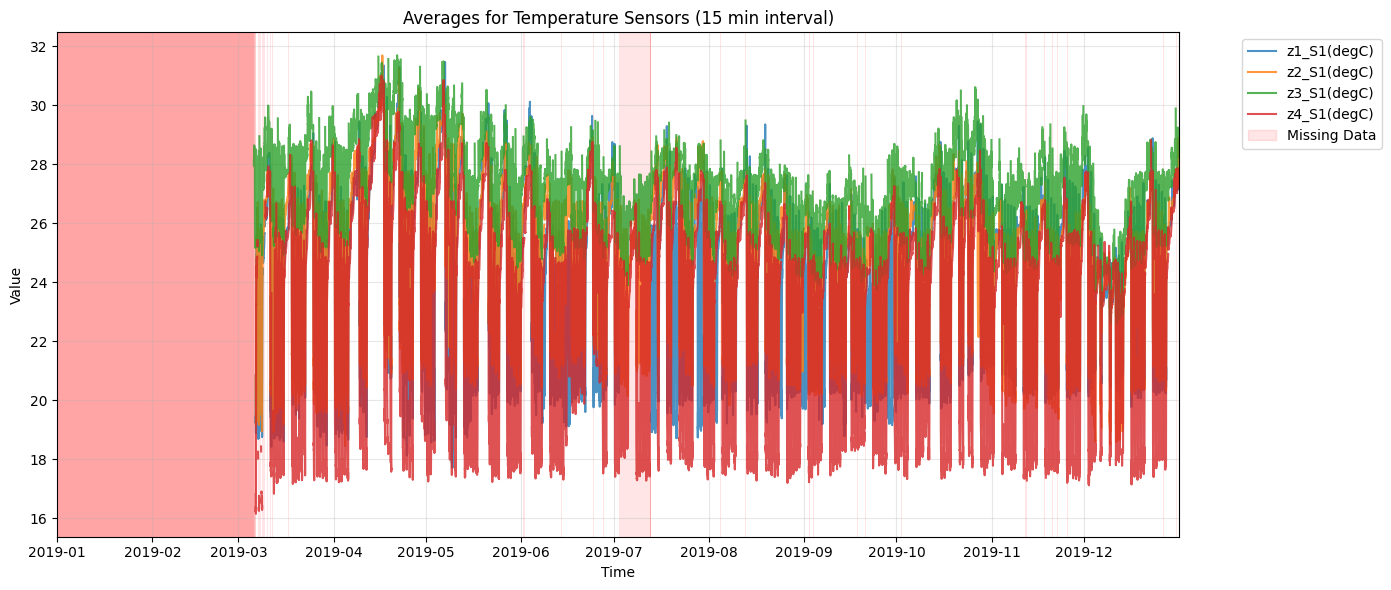

In [56]:
plot_outage_by_sensor_type('degC')

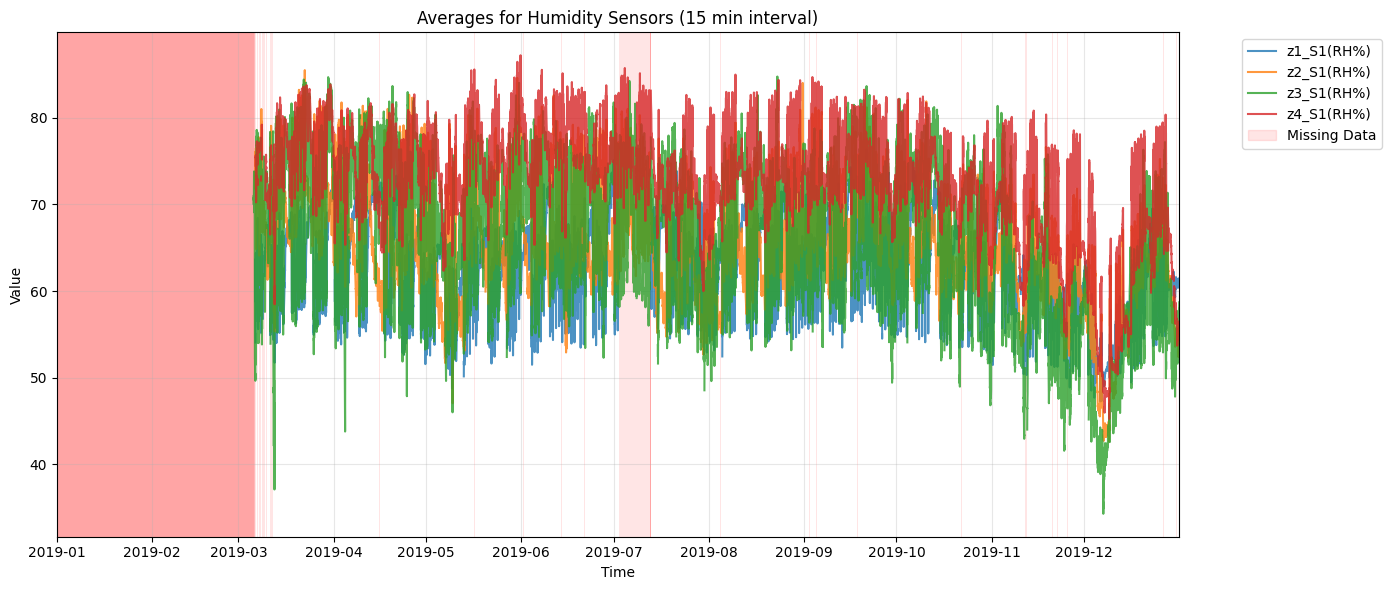

In [57]:
plot_outage_by_sensor_type('RH%')

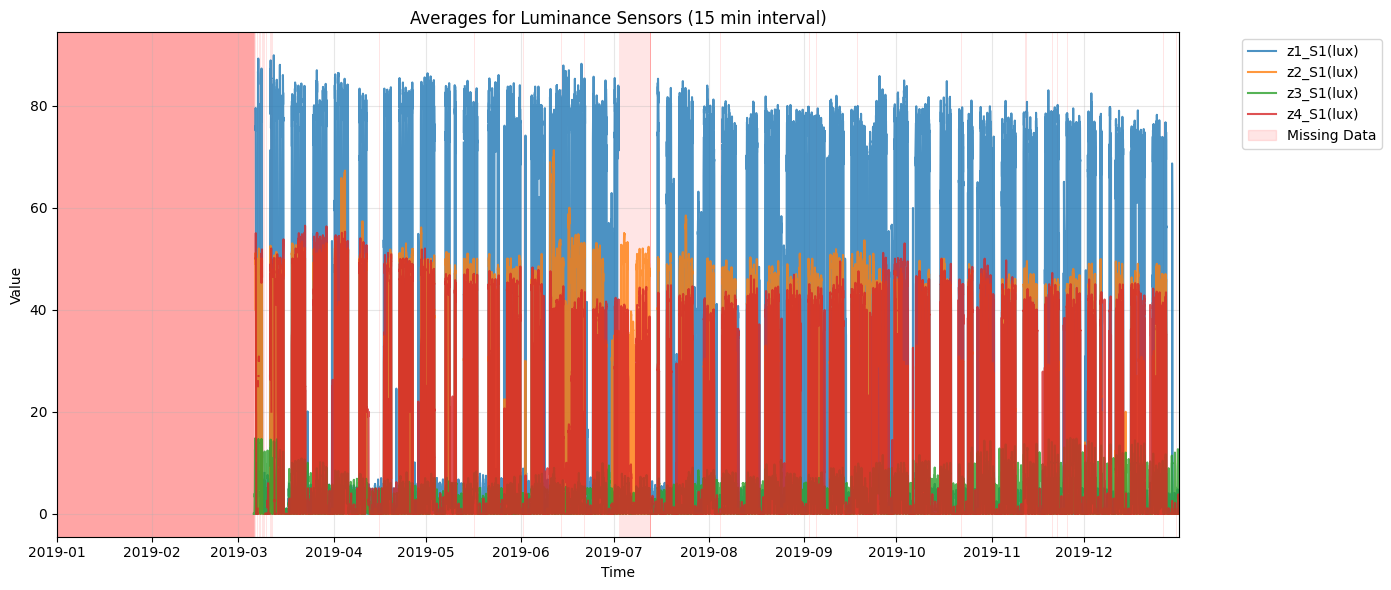

In [58]:
plot_outage_by_sensor_type('lux')

In [59]:
# The AC sensors have shown major outage spanning considerably shorter period
# between around 25 JAN to around 10 FEB

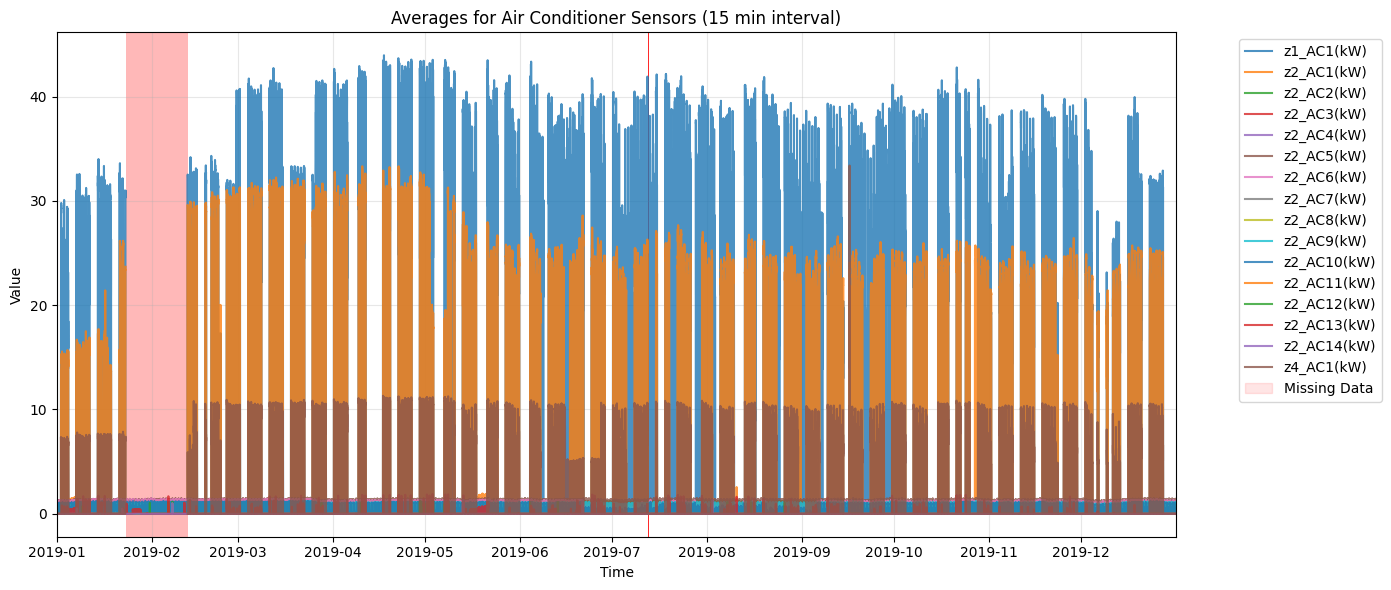

In [60]:
plot_outage_by_sensor_type('AC')

In [61]:
# The Plug and Lighting sensors have proven to be resilient throught 2019
# No major outage occurs in these 2 sensor types

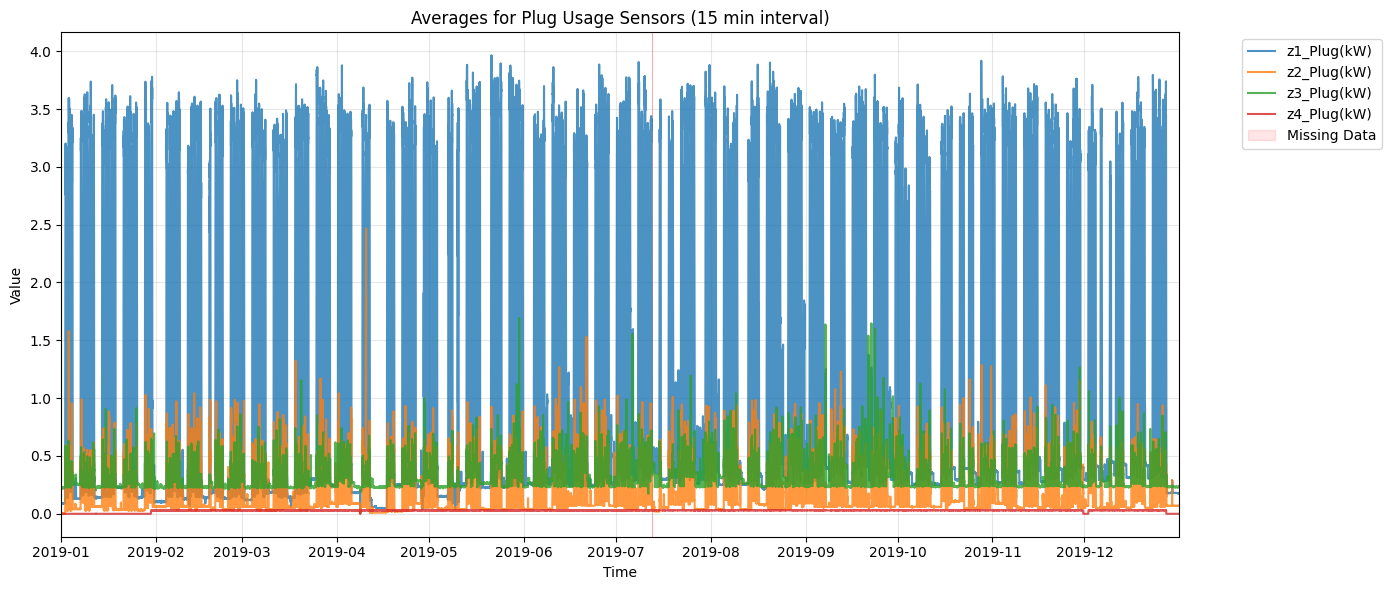

In [62]:
plot_outage_by_sensor_type('Plug')

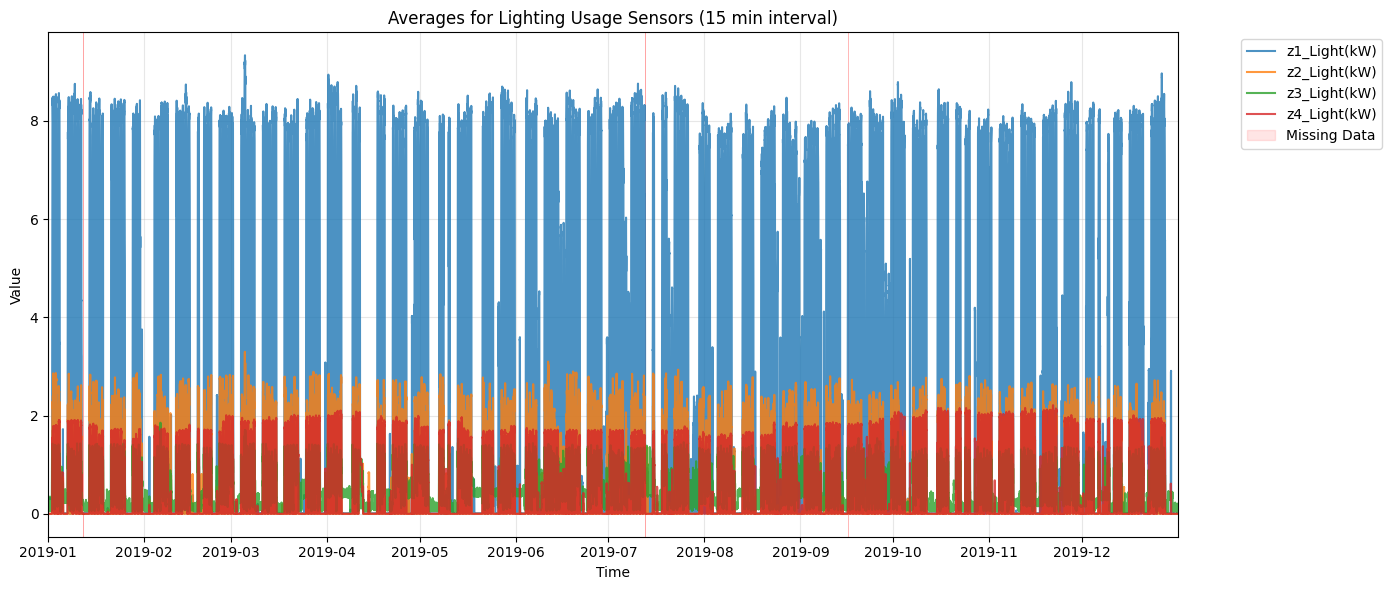

In [63]:
plot_outage_by_sensor_type('Light')

In [ ]:
# Next Step: Handle Missing Data

# Now that the patterns of the outage have been studied, 
# the next step is to handle the missing data for the dataset

# Machine Learning algorithms will be utilised to solve this problem

## Data Preparation

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2019-01-01 00:00:00 to 2019-12-31 23:59:00
Data columns (total 41 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   z1_AC1(kW)    495832 non-null  float64
 1   z1_Light(kW)  524967 non-null  float64
 2   z1_Plug(kW)   524964 non-null  float64
 3   z1_S1(degC)   413992 non-null  float64
 4   z1_S1(RH%)    413992 non-null  float64
 5   z1_S1(lux)    413992 non-null  float64
 6   z2_AC1(kW)    495710 non-null  float64
 7   z2_AC2(kW)    523441 non-null  float64
 8   z2_AC3(kW)    523441 non-null  float64
 9   z2_AC4(kW)    523441 non-null  float64
 10  z2_AC5(kW)    524949 non-null  float64
 11  z2_AC6(kW)    524949 non-null  float64
 12  z2_AC7(kW)    524949 non-null  float64
 13  z2_AC8(kW)    524949 non-null  float64
 14  z2_AC9(kW)    524949 non-null  float64
 15  z2_AC10(kW)   524949 non-null  float64
 16  z2_AC11(kW)   524949 non-null  float64
 17  z2_AC12(kW)   

In [61]:
# Extract time data from the index

df['month'] = df.index.month
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['hour'] = df.index.hour
df['minute'] = df.index.minute

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2019-01-01 00:00:00 to 2019-12-31 23:59:00
Data columns (total 41 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   z1_AC1(kW)    495832 non-null  float64
 1   z1_Light(kW)  524967 non-null  float64
 2   z1_Plug(kW)   524964 non-null  float64
 3   z1_S1(degC)   413992 non-null  float64
 4   z1_S1(RH%)    413992 non-null  float64
 5   z1_S1(lux)    413992 non-null  float64
 6   z2_AC1(kW)    495710 non-null  float64
 7   z2_AC2(kW)    523441 non-null  float64
 8   z2_AC3(kW)    523441 non-null  float64
 9   z2_AC4(kW)    523441 non-null  float64
 10  z2_AC5(kW)    524949 non-null  float64
 11  z2_AC6(kW)    524949 non-null  float64
 12  z2_AC7(kW)    524949 non-null  float64
 13  z2_AC8(kW)    524949 non-null  float64
 14  z2_AC9(kW)    524949 non-null  float64
 15  z2_AC10(kW)   524949 non-null  float64
 16  z2_AC11(kW)   524949 non-null  float64
 17  z2_AC12(kW)   

In [63]:
df

,z1_AC1(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),z2_AC5(kW),z2_AC6(kW),z2_AC7(kW),z2_AC8(kW),z2_AC9(kW),z2_AC10(kW),z2_AC11(kW),z2_AC12(kW),z2_AC13(kW),z2_AC14(kW),z2_Light(kW),z2_Plug(kW),z2_S1(degC),z2_S1(RH%),z2_S1(lux),z3_Light(kW),z3_Plug(kW),z3_S1(degC),z3_S1(RH%),z3_S1(lux),z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux),month,day,dayofweek,hour,minute
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,0.0,0.31,0.09,NaN,NaN,NaN,0.00,1.15,0.85,0.91,0.00,0.24,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,0.04,0.23,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,1,1,1,0,0
2019-01-01 00:01:00,0.0,0.31,0.09,NaN,NaN,NaN,0.00,1.14,0.84,0.90,0.00,0.24,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,0.04,0.23,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,1,1,1,0,1
2019-01-01 00:02:00,0.0,0.31,0.09,NaN,NaN,NaN,0.00,1.14,0.83,0.90,0.00,0.24,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,0.04,0.23,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,1,1,1,0,2
2019-01-01 00:03:00,0.0,0.31,0.09,NaN,NaN,NaN,0.85,1.15,0.84,0.91,0.00,1.10,0.00,0.76,0.00,0.85,0.0,0.0,0.0,0.0,0.0,0.01,NaN,NaN,NaN,0.04,0.23,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,1,1,1,0,3
2019-01-01 00:04:00,0.0,0.31,0.09,NaN,NaN,NaN,0.94,1.17,0.87,0.93,0.00,1.20,0.00,0.84,0.00,0.94,0.0,0.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,0.22,0.23,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,1,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:55:00,0.0,0.01,0.18,27.65,61.50,0.0,1.12,0.00,0.00,0.00,1.41,1.20,1.02,0.90,1.06,0.96,0.0,0.0,0.0,0.0,0.0,0.07,27.75,54.90,0.0,0.19,0.24,28.34,58.94,0.0,0.0,0.0,0.0,27.81,55.30,0.0,12,31,1,23,55
2019-12-31 23:56:00,0.0,0.01,0.18,27.66,61.45,0.0,1.13,0.00,0.00,0.00,1.40,1.22,1.01,0.92,1.05,0.98,0.0,0.0,0.0,0.0,0.0,0.07,27.76,54.98,0.0,0.19,0.24,28.34,58.36,0.0,0.0,0.0,0.0,27.81,55.60,0.0,12,31,1,23,56
2019-12-31 23:57:00,0.0,0.01,0.18,27.65,61.49,0.0,1.16,0.00,0.00,0.00,1.41,1.24,1.01,0.95,1.05,1.01,0.0,0.0,0.0,0.0,0.0,0.07,27.77,54.88,0.0,0.19,0.24,28.37,57.74,0.0,0.0,0.0,0.0,27.80,55.10,0.0,12,31,1,23,57


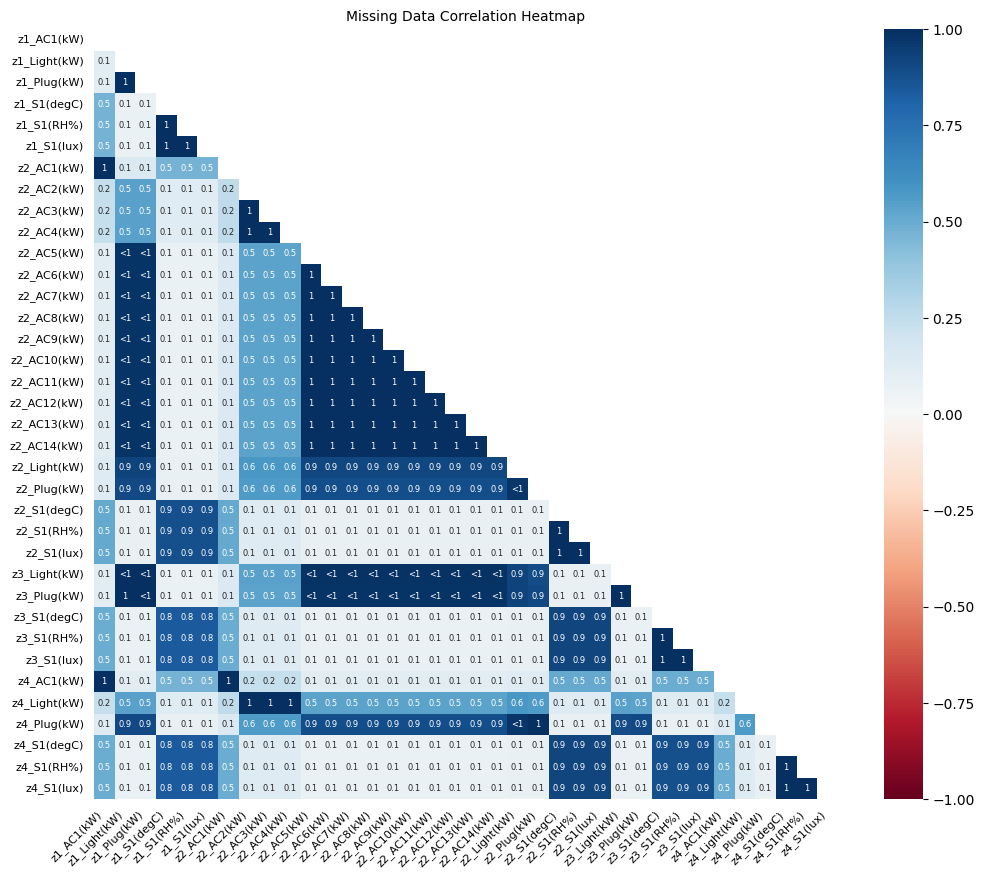

In [64]:
msno.heatmap(df, figsize=(12, 10), fontsize=8)
plt.title('Missing Data Correlation Heatmap', fontsize=10)
plt.show()

In [65]:
# Conclusion
